# Scikit Learn - Anomaly Detection

https://scikit-learn.org/stable/modules/outlier_detection.html

Here, we will learn about what is anomaly (abnormal or outlier) detection in Sklearn and how it is used in identification of the data points.

Anomaly detection is a technique used to identify data points in dataset that does not fit well with the rest of the data. 

It has many applications in business such as fraud detection, intrusion detection, system health monitoring, surveillance, and predictive maintenance. 

Anomalies, which are also called ***outlier***, can be divided into following three categories −

- Point anomalies − It occurs when an individual data instance is considered as anomalous w.r.t the rest of the data.

- Contextual anomalies − Such kind of anomaly is context specific. It occurs if a data instance is anomalous in a specific context.

- Collective anomalies − It occurs when a collection of related data instances is anomalous w.r.t entire dataset rather than individual values.

## Methods

Two methods namely ***outlier detection*** and ***novelty (new) detection*** can be used for anomaly detection. 

It’s necessary to see the distinction between them.

## Outlier detection

The training data contains outliers that are far from the rest of the data. 

Such outliers are defined as observations. 

That’s the reason, outlier detection estimators always try to fit the region having most concentrated training data while ignoring the deviant observations. 

It is also known as unsupervised anomaly detection.

## Novelty detection

It is concerned with detecting an unobserved pattern in new observations which is not included in training data.

Here, the training data is not polluted by the outliers. 

It is also known as semi-supervised anomaly detection.

There are set of ML tools, provided by scikit-learn, which can be used for both outlier detection as well novelty detection.

These tools first implementing object learning from the data in an unsupervised by using fit () method as follows −

    estimator.fit(X_train)

Now, the new observations would be sorted as ***inliers (labeled 1)*** or ***outliers (labeled -1)*** by using predict() method as follows −

    estimator.fit(X_test)

The estimator will first compute the raw scoring function and then predict method will make use of threshold on that raw scoring function. 

We can access this raw scoring function with the help of ***score_sample*** method and can control the threshold by ***contamination*** parameter.

We can also define ***decision_function*** method that defines outliers as negative value and inliers as non-negative value.

    estimator.decision_function(X_test)


## Sklearn algorithms for Outlier Detection

https://scikit-learn.org/stable/modules/generated/sklearn.covariance.EllipticEnvelope.html

Let us begin by understanding what an elliptic envelop is.

## Fitting an elliptic envelop

This algorithm assume that regular data comes from a known distribution such as Gaussian distribution. 

For outlier detection, Scikit-learn provides an object named ***covariance.EllipticEnvelop***.

This object fits a robust covariance estimate to the data, and thus, fits an ellipse to the central data points. 

It ignores the points outside the central mode.

## Parameters

Following table consist the parameters used by sklearn. covariance.EllipticEnvelop method −

| No  | Parameter and Description |
| :-- | :---- |
| 1   | store_precision − Boolean, optional, default = True |
|     | We can specify it if the estimated precision is stored. |
| 2   | assume_centered − Boolean, optional, default = False |
|     | If we set it False, it will compute the robust location and covariance directly with the help of FastMCD algorithm. |
|     | On the other hand, if set True, it will compute the support of robust location and covarian. |
| 3   | support_fraction − float in (0., 1.), optional, default = None |
|     | This parameter tells the method that how much proportion of points to be included in the support of the raw MCD estimates. |
| 4   | contamination − float in (0., 1.), optional, default = 0.1 |
|     | It provides the proportion of the outliers in the data set. |
| 5   | random_state − int, RandomState instance or None, optional, default = none |
|     | This parameter represents the seed of the pseudo random number generated which is used while shuffling the data. |
|     | Followings are the options − |
|     | - int − In this case, random_state is the seed used by random number generator. |
|     | - RandomState instance − In this case, random_state is the random number generator. |
|     | - None − In this case, the random number generator is the RandonState instance used by np.random. |

## Attributes

Following table consist the attributes used by sklearn. covariance.EllipticEnvelop method −

| No  | Attributes and Description |
| :-- | :---- |
| 1   | support_ − array-like, shape(n_samples,) |
|     | It represents the mask of the observations used to compute robust estimates of location and shape. |
| 2   | location_ − array-like, shape (n_features) |
|     | It returns the estimated robust location. |
| 3   | covariance_ − array-like, shape (n_features, n_features) |
|     | It returns the estimated robust covariance matrix. |
| 4   | precision_ − array-like, shape (n_features, n_features) |
|     | It returns the estimated pseudo inverse matrix. |
| 5   | offset_ − float |
|     | It is used to define the decision function from the raw scores. |
|     | decision_function = score_samples -offset_ |

## Example of Anomaly Dection

In [50]:
import numpy as np
from sklearn.covariance import EllipticEnvelope
true_cov = np.array([[.8, .3],
                     [.3, .4]])
X = np.random.RandomState(0).multivariate_normal(mean=[0, 0],
                                                 cov=true_cov,
                                                 size=500)
cov = EllipticEnvelope(random_state=0).fit(X)
# predict returns 1 for an inlier and -1 for an outlier
print ('cov.predict([[0, 0],[3, 3]]):\n', cov.predict([[0, 0],[3, 3]]))
print()
# array([ 1, -1])
print('cov.covariance_:\n', cov.covariance_)
print()
#array([[0.7411..., 0.2535...],
#       [0.2535..., 0.3053...]])
print('cov.location_:\n', cov.location_)
print()
#array([0.0813... , 0.0427...])

cov.predict([[0, 0],[3, 3]]):
 [ 1 -1]

cov.covariance_:
 [[0.74118335 0.25357049]
 [0.25357049 0.30531502]]

cov.location_:
 [0.0813539  0.04279722]



# Isolation Forest

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.IsolationForest.html
    
Isolation Forest Algorithm.

Return the anomaly score of each sample using the IsolationForest algorithm

The IsolationForest 'isolates' observations by randomly selecting a feature and then randomly selecting a split value between the maximum and minimum values of the selected feature.

Since recursive partitioning can be represented by a tree structure, the number of splittings required to isolate a sample is equivalent to the path length from the root node to the terminating node.

This path length, averaged over a forest of such random trees, is a measure of normality and our decision function.

Random partitioning produces noticeably shorter paths for anomalies. 

Hence, when a forest of random trees collectively produce shorter path lengths for particular samples, they are highly likely to be anomalies.

In case of high-dimensional dataset, one efficient way for outlier detection is to use random forests. 

The scikit-learn provides ensemble.

IsolationForest method that isolates the observations by randomly selecting a feature. 

Afterwards, it randomly selects a value between the maximum and minimum values of the selected features.

Here, the number of splitting needed to isolate a sample is equivalent to path length from the root node to the terminating node.


# Swamping and Masking in Anomaly detection in in Isolation Forests

https://medium.com/walmartglobaltech/swamping-and-masking-in-anomaly-detection-how-subsampling-in-isolation-forests-helps-mitigate-bb192a8f8dd5
    
1) What is Anomaly Detection?

Anomaly Detection (also outlier detection) is the identification of rare items, events or observations.

2) What is Swamping and Masking?

Anomalies are the rare events, and this makes it very difficult to label these with high accuracy. 

Swamping is the phenomenon of labelling normal events as anomalies.

When clustering algorithms are used, the data points belonging to different clusters gets merged into one cluster, if the number of segments (including outlier segments) in the dataset is not known. This causes the outlier cluster merged to a cluster with normal data points. Basically, the outliers are not detected. This is called Masking. Swamping and Masking are more common when dataset size is large. This will be evident from the example shared in the next section. 

Any anomaly detection technique should be robust against swamping and masking.

3) Isolation Forest Algorithm

Isolation Forest builds an ensemble of trees on the dataset based on the random cutoffs on the features selected at random. 

These trees isolate every point and the average path length by all the trees to isolate the points helps in identifying the anomalies. 

Shorter the average path, more anomalous the data instance is. Let us take an example of a dataset with two features x1 and x2. Isolation Forest follows basic principle of decision trees and will create splits on the values of x1 and x2 to define(isolate) the points. 

It can be observed from the below figure that a normal point N is isolated by having multiple splits on both the features x1 and x2. 

The path length is long.

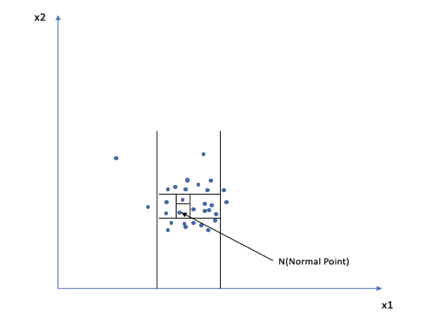

However, an anomaly point A is isolated by just one split on x1.

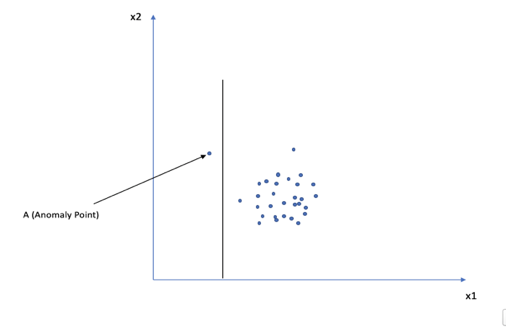

Hence, a higher isolation score is assigned to A compared to N. 

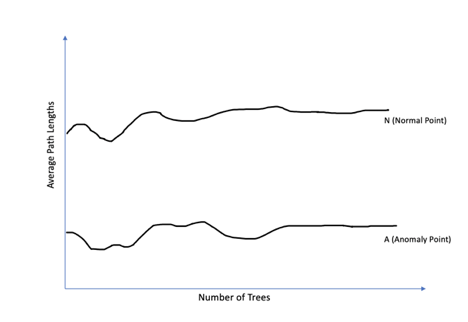

The Average Path Lengths (Average number of splits required to isolate a point) converge with increase in the number of trees.

In the above figure, the Anomaly Point (A) has shorter average path length compared to Normal point (N)

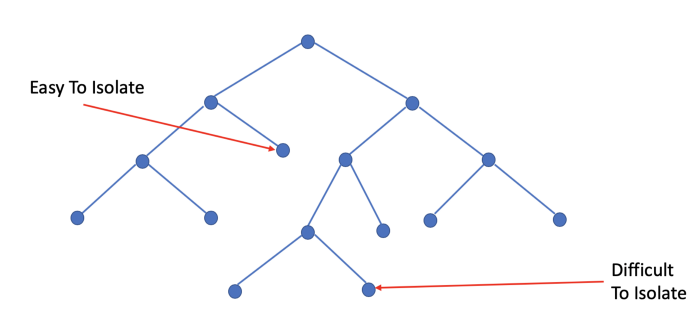


## Parameters

Followings table consist the parameters used by sklearn. ensemble.IsolationForest method −

| No  | Parameter and Description |
| :-- | :-------- |
| 1   | n_estimators − int, optional, default = 100 |
|     | It represents the number of base estimators in the ensemble. |
| 2   | max_samples − int or float, optional, default = 'auto' |
|     | It represents the number of samples to be drawn from X to train each base estimator. If we choose int as its value, it will draw max_samples samples. If we choose float as its value, it will draw max_samples ∗ 𝑋.shape[0] samples. |
|     | And, if we choose auto as its value, it will draw max_samples = min(256,n_samples). |
| 3   | support_fraction − float in (0., 1.), optional, default = None |
|     | This parameter tells the method that how much proportion of points to be included in the support of the raw MCD (Minimum COvariance Determinant) estimates. |
| 4   | contamination − auto or float, optional, default = auto |
|     | It provides the proportion of the outliers in the data set. If we set it default i.e. auto, it will determine the threshold as in the original paper. |
|     | If set to float, the range of contamination will be in the range of [0,0.5]. |
| 5   | random_state − int, RandomState instance or None, optional, default = none |
|     | This parameter represents the seed of the pseudo random number generated which is used while shuffling the data. |
|     | Followings are the options − |
|     | - int − In this case, random_state is the seed used by random number generator. |
|     | - RandomState instance − In this case, random_state is the random number generator. |
|     | - None − In this case, the random number generator is the RandonState instance used by np.random. |
| 6   | max_features − int or float, optional (default = 1.0) |
|     | It represents the number of features to be drawn from X to train each base estimator. |
|     | If we choose int as its value, it will draw max_features features. |
|     | If we choose float as its value, it will draw max_features * X.shape[𝟏] samples. |
| 7   | bootstrap − Boolean, optional (default = False) |
|     | Its default option is False which means the sampling would be performed without replacement. |
|     | And on the other hand, if set to True, means individual trees are fit on a random subset of the training data sampled with replacement. |
| 8   | n_jobs − int or None, optional (default = None) |
|     | It represents the number of jobs to be run in parallel for fit() and predict() methods both. |
| 9   | verbose − int, optional (default = 0) |
|     | This parameter controls the verbosity of the tree building process. |
| 10  | warm_start − Bool, optional (default=False) |
|     | If warm_start = true, we can reuse previous calls solution to fit and can add more estimators to the ensemble. |
|     | But if is set to false, we need to fit a whole new forest. |
|     | Note: New in version 0.21. |

## Attributes

Following table consist the attributes used by sklearn. ensemble.IsolationForest method −

| No  | Attributes and Description |
| :-- | :--- |
| 1   | estimators_ − list of DecisionTreeClassifier |
|     | Providing the collection of all fitted sub-estimators. |
| 2   | max_samples_ − integer |
|     | It provides the actual number of samples used. |
| 3   | offset_ − float |
|     | It is used to define the decision function from the raw scores. |
|     | We have the relation: decision_function = score_samples - offset_ |

In [32]:
from sklearn.ensemble import IsolationForest
import numpy as np
X = np.array([[-1, -2], [-3, -3], [-3, -4], [0, 0], [-50, 60]])
OUTDclf = IsolationForest(n_estimators = 10, contamination='auto', behaviour="new")
OUTDclf.fit(X)

IsolationForest(behaviour='new', bootstrap=False, contamination='auto',
        max_features=1.0, max_samples='auto', n_estimators=10, n_jobs=None,
        random_state=None, verbose=0)

In [28]:
# https://scikit-learn.org/stable/modules/outlier_detection.html#
# https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.IsolationForest.html
from sklearn.ensemble import IsolationForest
import numpy as np
X = np.array([[-1, -1], [-2, -1], [-3, -2], [0, 0], [-20, 50], [3, 5]])
#clf = IsolationForest(n_estimators=10, warm_start=True)
clf = IsolationForest(n_estimators=10, contamination='auto', behaviour="new")
clf.fit(X)  # fit 10 trees  
clf.set_params(n_estimators=20)  # add 10 more trees  
clf.fit(X)  # fit the added trees  

IsolationForest(behaviour='new', bootstrap=False, contamination='auto',
        max_features=1.0, max_samples='auto', n_estimators=20, n_jobs=None,
        random_state=None, verbose=0)

# Local Outlier Factor

https://en.wikipedia.org/wiki/Local_outlier_factor
    
Basic idea of LOF (Local Outlier Factor): comparing the local density of a point with the densities of its neighbors. 

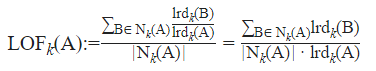    
    
### A has a much lower density than its neighbors.

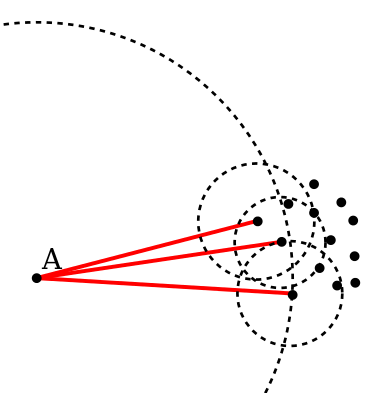


LOF(k) ~ 1 means Similar density as neighbors,

LOF(k) < 1 means Higher density than neighbors (Inlier),

LOF(k) > 1 means Lower density than neighbors (Outlier)

### Illustration of the reachability distance.

Objects B and C have the same reachability distance (k=3), while D is not a k nearest neighbor

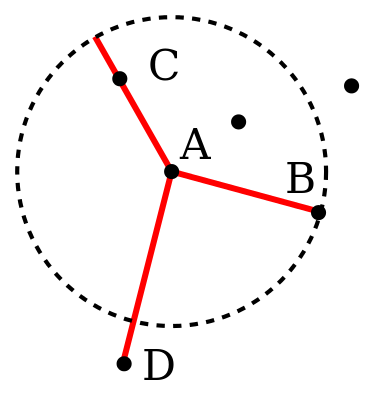


## LOF Algorithm 

LOF (Local Outlier Factor) algorithm is another efficient algorithm to perform outlier detection on high dimension data. 
     
The scikit-learn provides neighbors.LocalOutlierFactor method that computes a score, called local outlier factor, reflecting the degree of anomality of the observations.
     
The main logic of this algorithm is to detect the samples that have a substantially lower density than its neighbors. 
     
Thats why it measures the local density deviation of given data points w.r.t. their neighbors.

## Parameters

https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.LocalOutlierFactor.html
    
Followings table consist the parameters used by sklearn. neighbors.LocalOutlierFactor method

| No  | Parameter and Description |
| :-- | :---- | 
| 1   | n_neighbors − int, optional, default = 20 |
|     | It represents the number of neighbors use by default for kneighbors query. If n_neighbors is larger than the number of samples provided, all samples will be used. | 
| 2   | algorithm − optional |
|     | Which algorithm to be used for computing nearest neighbors. |
|     | - If you choose ball_tree, it will use BallTree algorithm. |
|     | - If you choose kd_tree, it will use KDTree algorithm. |
|     | - If you choose brute, it will use brute-force search algorithm. |
|     | - If you choose auto, it will decide the most appropriate algorithm on the basis of the value we passed to fit() method. |
| 3   | leaf_size − int, optional, default = 30 |
|     | The value of this parameter can affect the speed of the construction and query. |
|     | It also affects the memory required to store the tree. |
|     | This parameter is passed to BallTree or KdTree algorithms. |
| 4   | contamination − auto or float, optional, default = auto |
|     | It provides the proportion of the outliers in the data set. |
|     | If we set it default, i.e., auto, it will determine the threshold as in the original paper. |
|     | If set to float, the range of contamination will be in the range of [0,0.5]. |
| 5   | metric − string or callable, default |
|     | It represents the metric used for distance computation. |
| 6   | P − int, optional (default = 2) |
|     | It is the parameter for the Minkowski metric. |
|     | P=1 is equivalent to using manhattan_distance, i.e., L1. |
|     | P=2 is equivalent to using euclidean_distance, i.e., L2. |
| 7   | novelty − Boolean, (default = False) |
|     | By default, LOF algorithm is used for outlier detection but it can be used for novelty detection if we set novelty = true. |
| 8   | n_jobs − int or None, optional (default = None) |
|     | It represents the number of jobs to be run in parallel for fit() and predict() methods both. |

## Attributes

Following table consist the attributes used by sklearn.neighbors.LocalOutlierFactor method −

| No  | Attributes and Description |
| :-- | :-- |
| 1   | negative_outlier_factor_ − numpy array, shape(n_samples,) |
|     | Providing opposite LOF of the training samples. |
| 2   | n_neighbors_ − integer |
|     | It provides the actual number of neighbors used for neighbors queries. |
| 3   | offset_ − float |
|     | It is used to define the binary labels from the raw scores. |

In [44]:
# https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.NearestNeighbors.html
from sklearn.neighbors import NearestNeighbors
samples = [[0., 0., 0.], [0., .5, 0.], [1., 1., .5]]
LOFneigh = NearestNeighbors(n_neighbors = 1, algorithm = "ball_tree", p=1)
print('LOFneigh.fit(samples):\n', LOFneigh.fit(samples))
print()
print('LOFneigh.kneighbors([[.5, 1., 1.5]]):\n', LOFneigh.kneighbors([[.5, 1., 1.5]]))
print()
#nbrs = LOFneigh.radius_neighbors([[0, 0, 1.3]], 0.4, return_distance=False)
#np.asarray(nbrs[0][0])

LOFneigh.fit(samples):
 NearestNeighbors(algorithm='ball_tree', leaf_size=30, metric='minkowski',
         metric_params=None, n_jobs=None, n_neighbors=1, p=1, radius=1.0)

LOFneigh.kneighbors([[.5, 1., 1.5]]):
 (array([[1.5]]), array([[2]], dtype=int64))



# One-Class SVM

The One-Class SVM, introduced by Schölkopf et al., is the unsupervised Outlier Detection. 

It is also very efficient in high-dimensional data and estimates the support of a high-dimensional distribution. It is implemented in the Support Vector Machines module in the Sklearn.svm.OneClassSVM object. For defining a frontier, it requires a kernel (mostly used is RBF) and a scalar parameter.


## Example One-Class SVM

In [46]:
from sklearn.svm import OneClassSVM
X = [[0], [0.89], [0.90], [0.91], [1]]
OSVMclf = OneClassSVM(gamma = 'scale').fit(X)
print('OSVMclf.score_samples(X):\n', OSVMclf.score_samples(X))
print()

OSVMclf.score_samples(X):
 [1.00296414 1.43923306 1.44902238 1.45691778 1.43923306]

